In [13]:
import json
import statistics
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
def count_words(data):
    lens = set ()
    for i in data:
        val = 0
        for j in i['primary_text']:
            words = j.split()
            val += len(words)
        if i['secondary_text'] is not None:
            for j in i['secondary_text']:
                words = j.split()
                val += len(words)
        for j in i['statement']:
            words = j.split()
            val += len(words)
        lens.add(val)
    return lens

In [16]:
def get_min_max(train, dev):
    train_set = count_words(train)
    #print(train_set)
    dev_set = count_words(dev)
    #print(dev_set)
    total = train_set.union(dev_set)
    # print(f'min = {min(total)}')
    # print(f'max = {max(total)}')
    # print(f'mean = {statistics.mean(total)}')
    return total

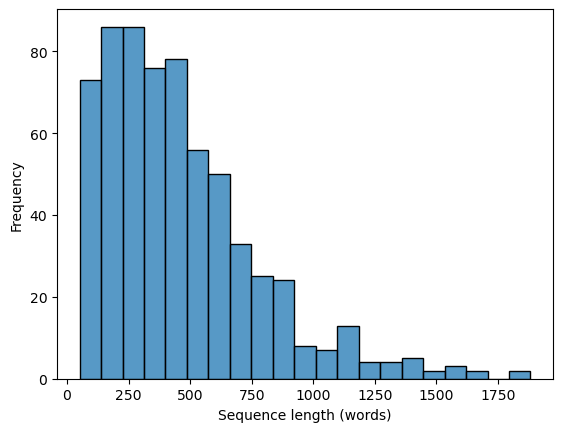

In [19]:
if __name__ == "__main__":
    train = './Data/train.json'
    dev = './Data/dev.json'
    lengths = set()
    with open(train) as fh:
        t = json.load(fh)
        #print(t[0])
        with open(dev) as fh2:
            d = json.load(fh2)
            lengths = get_min_max(t,d)
    lengths = list(lengths)
    sns.histplot(data=lengths)
    plt.xlabel('Sequence length (words)')
    plt.ylabel('Frequency')
    plt.savefig('length_dist.jpg')